<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%A1%D1%91%D1%80%D0%B5%D0%BD%D1%81%D0%B5%D0%BD_%D0%94%D0%B0%D0%B9%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install multiset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from multiset import Multiset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def tokenizetext(txt):
    arr = []
    for wrd in txt:
        arr += [wrd]
    return Multiset(arr)


def sorenson_dice(text1, text2):
    ''' Sorenson-Dice similarity of Multisets '''
    bc1, bc2 = tokenizetext(text1), tokenizetext(text2)
    return 2 * len(bc1 & bc2) / (len(bc1) + len(bc2))

In [4]:
df = pd.read_csv('lemmas_levels.csv', sep=',')
df.index = np.arange(1, len(df) + 1)
mark1 = "1E"
mark2 = "2I"
mark3 = "3AU"
mark4 = "4S"
ll1 = df.query('level == @mark1')
ll2 = df.query('level == @mark2')
ll3 = df.query('level == @mark3')
ll4 = df.query('level == @mark4')

In [5]:
df = pd.read_csv('dictionary_csv.csv', sep=',')
df.index = np.arange(1, len(df) + 1)
dc1 = df[:1000]
dc2 = df[1000:2000]
dc3 = df[2000:3000]
dc4 = df[3000:4000]

In [6]:
data1 = ll1['lemma'].str.strip('\'')
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.43487321986800975


In [7]:
data1 = ll2['lemma'].str.strip('\'')
data2 = dc2['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.161055750067331


In [8]:
data1 = ll3['lemma'].str.strip('\'')
data2 = dc3['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.011102947179361581


In [9]:
data1 = ll4['lemma'].str.strip('\'')
data2 = dc4['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.008679023242130037


In [10]:
df = pd.read_csv('A1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
A1 = df[:754]

In [11]:
data1 = ll1['lemma'].str.strip('\'')
data2 = A1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.4238511203949867


In [12]:
df = pd.read_csv('A2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
A2 = df[:1048]

In [13]:
data1 = ll2['lemma'].str.strip('\'')
data2 = A2['Unnamed: 0'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.12390321722946025


In [14]:
df = pd.read_csv('B1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
B1 = df[:1081]

In [15]:
data1 = ll3['lemma'].str.strip('\'')
data2 = B1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.008110300081103


In [16]:
df = pd.read_csv('B2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
B2 = df[:3331]

In [17]:
data1 = ll4['lemma'].str.strip('\'')
data2 = B2['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.03403026307528097


In [18]:
data1 = dc1['lemma'].str.lower()
data2 = A1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.35347776510832385


In [19]:
data1 = dc2['lemma'].str.lower()
data2 = A2['Unnamed: 0'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.14453125


In [20]:
data1 = dc3['lemma'].str.lower()
data2 = B1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.12686208553580008


In [21]:
data1 = dc4['lemma'].str.lower()
data2 = B2['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.1353036250288617


In [47]:
columns=['Harvard (0)', 'Sharoff (1)', 'Twirll (2)']

data = [
[1, 0.43, 0.42],
[0.43, 1, 0.35],
[0.42, 0.35, 1]
]

df = pd.DataFrame(data, columns=columns)
df.to_csv(r'matrix.csv')

<AxesSubplot:>

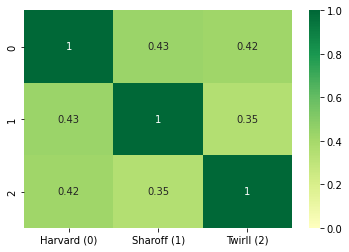

In [48]:
sns.heatmap(df, annot=True, vmin=0, vmax=1, center=0, cmap ='RdYlGn')